# Prueba

## Preparación del Notebook

### Importación de Librerías

In [1]:
# data analysis and wrangling
import pandas as pd
#import numpy as np
#import random as rnd
import opendatasets as od

# visualization
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
#from sklearn.svm import SVC, LinearSVC
#from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.metrics import accuracy_scor

### Descarga de Datasets desde Kaggle

In [2]:
od.download("https://www.kaggle.com/c/titanic/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

### Carga de Datasets

In [3]:
#train_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/train.csv"
train_folder = "titanic/train.csv"
train_df = pd.read_csv(train_folder)

In [4]:
#test_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/test.csv"
test_folder = "titanic/test.csv"
test_df = pd.read_csv(test_folder)

## 1.- Limpieza de Datos

### 1.1.- Dataset de Entrenamiento

##### Dataset de Entrenamiento Original

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Información de Variables

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2.- Primera Limpieza de Datos 

##### Renombramos Pclass por TicketClass
Esto se realiza para tener un nombre mas representativo

In [7]:
train_df = train_df.rename(columns = {'Pclass' : 'TicketClass'})

##### Análisis de Variable "Ticket"
En la información de la variable se aprecia que es del tipo objeto y en el Dataframe es posible apreciar que posee diferentes valores, por lo cual el número de ticket podría no ser representativo para el análisis

In [8]:
len(train_df['Ticket'].unique())

681

##### Eliminación de Variables
Se eliminan las variabres que no contribuyen al análisis:
- Nombre: No proporciona información referente a la supervivencia de un pasajero
- Ticket: Posee 681 valores diferentes, lo que no aporta en identificar la supervivencia
- Tarifa:
- Cabina: Posee valor solo en 204 de 891 individuos equivalente a aproximadamente un 23%, por lo cual no es recomendable reemplazar los valores
- Puerto de Embarque:
- Edad:

In [9]:
train_df = train_df.drop(['Name','Ticket','Fare','Cabin','Embarked','Age'],axis =1)

In [10]:
train_df.head()

,PassengerId,Survived,TicketClass,Sex,SibSp,Parch
0,1,0,3,male,1,0
1,2,1,1,female,1,0
2,3,1,3,female,0,0
3,4,1,1,female,1,0
4,5,0,3,male,0,0


##### Etiquetación de Variables
En este caso se modifica el tipo de la variable "Sexo" de tipo "objeto" a etiquetas codificadas en forma "numérica".

In [11]:
label_encoder_sex = LabelEncoder()
train_df.iloc[:,3]  = label_encoder_sex.fit_transform(train_df.iloc[:,3])

In [12]:
train_df.head()

,PassengerId,Survived,TicketClass,Sex,SibSp,Parch
0,1,0,3,1,1,0
1,2,1,1,0,1,0
2,3,1,3,0,0,0
3,4,1,1,0,1,0
4,5,0,3,1,0,0


##### Reordenamiento de Dataframe 
Se realiza un ordenamiento que busca dejar la variable objetivo al final, a fin de posteriormente separarlo de los datos a ingresar en el modelo de red neuronal.

In [13]:
train_df = train_df[['PassengerId','Sex','SibSp','Parch','TicketClass','Survived']]
train_df.head()

,PassengerId,Sex,SibSp,Parch,TicketClass,Survived
0,1,1,1,0,3,0
1,2,0,1,0,1,1
2,3,0,0,0,3,1
3,4,0,1,0,1,1
4,5,1,0,0,3,0


## 2.- Entrenamiento de Modelo


### 2.1.- Datasets de Entrenamiento y Validación

##### Dataframe de Datos

In [14]:
train_data = train_df.iloc[:,0:5]   

##### Dataframe de Variable Objetivo

In [15]:
train_target = train_df.iloc[:,5]   

##### Lista de Características de los Datos

In [16]:
features = train_data.columns.values
features

array(['PassengerId', 'Sex', 'SibSp', 'Parch', 'TicketClass'],
      dtype=object)

##### Separación de Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target,test_size=0.3,random_state=12)

##### Normalización de los Datos

In [18]:
# from sklearn.preprocessing import StandardScaler 
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(train_data)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### 2.2.-Entrenamiento del Modelo

##### Selección de Modelo Secuencial de Keras

In [19]:
model = models.Sequential()

In [20]:
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’, ‘sigmoid’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# alpha asociado a regularizacion l2, basado en la fuerza de la regularizacion
# learning_rate opera solo si solver es 'sgd'

##### Modelo 1  de Red Neuronal
Modelo de 3 Capas

In [21]:
# Capa 1
model.add(Dense(input_dim=len(features), units=20, activation='relu'))
# Capa 2
model.add(Dense(input_dim=20, units=3, activation='relu'))
# Capa de Salida
model.add(Dense(input_dim=3, units=1, activation='sigmoid'))

Epoch 1/10
39/39 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.6003
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6324
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7512
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5097 - accuracy: 0.8010
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7994
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7994
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.8042
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7978
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8026
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7836
Training accuracy: 0.

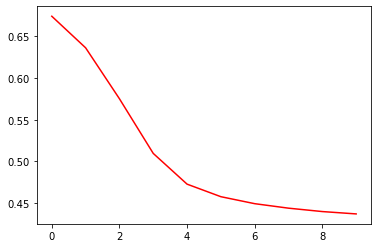

In [22]:

# define our loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=16)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()